Implementation of finite horizon bernoulli bandit problems 
1. Epsilon greedy algorithm
2. UCB algorithm

In [1]:
import numpy as np

In [2]:
def delta_calc(t):
    return(1/(1 + t * (np.log(t)) ** 2))

In [3]:
#np.random.seed(122)

def epsilon_greedy(probabilities, N, T, epsilon): 
    """
    Provide probabilities as an array of N length.
    """
    
    # initialize

    # define play # holder
    K = np.zeros([N+1,T]).astype(int) # no of arms is rows + 1, no of stages is columns
    K[0:,0] = 0

    # define probability estimate holder
    phat = np.zeros([N+1,T]) # no of arms is rows, no of stages is columns
    phat[0:,0] = 0
    
    
    # populate arms with initial estimates
    for t in range(1, T):
        if t <= N:
            # pull arm t and update counter
            K[t,t] = K[t,t-1] + 1
            # update probability
            phat[t,t] = np.random.binomial(size=1, n=1, p = probabilities[t-1])

            # update non-pulled arms
            for i in range(1,N):
                if i != t:
                    K[i,t] = K[i,t-1]
                    phat[i,t] = phat[i,t-1]

        else:
            # flip a coin to decide whether to explore or exploit
            decider = np.random.binomial(size = 1, n = 1, p = epsilon)
            #print(decider)

            # choose index of arm to pull
            if decider == 1:
                # if true play random arm
                at = np.random.randint(1,N+1,1)[0]
                #print("Explore new arm:", at)
            else:
                # if false play the arm with the highest probability
                at = np.where(phat[:,t-1] == np.amax(phat[:,t-1]))[0][0] # tie braker rule: select second one if multiple
                #print("Exploit arm:", at)


            # update pulled arm
            K[at,t] = K[at, t-1] + 1
            zt = np.random.binomial(size=1, n=1, p = probabilities[at-1])
            phat[at,t] = (zt + K[at, t-1] * phat[at,t-1])/(K[at, t])

            # update non-pulled arms
            for i in range(1,N+1):
                if i != at:
                    K[i,t] = K[i,t-1]
                    phat[i,t] = phat[i,t-1]
    
    return(K, phat) # arrays of counts and estimates

In [4]:
#np.random.seed(122)

def UCB(probabilities, N, T): 
    """
    Provide probabilities as an array of N length.
    """

    # initialize

    # define play # holder
    K = np.zeros([N+1,T]).astype(int) # no of arms is rows + 1, no of stages is columns
    K[0:,0] = 0

    # define probability estimate holder
    phat = np.zeros([N+1,T]) # no of arms is rows, no of stages is columns
    phat[0:,0] = 0


    # populate arms with initial estimates
    for t in range(1, T):
        if t <= N:
            # pull arm t and update counter
            K[t,t] = K[t,t-1] + 1
            # update probability
            phat[t,t] = np.random.binomial(size=1, n=1, p = probabilities[t-1])

            # update non-pulled arms
            for i in range(1,N):
                if i != t:
                    K[i,t] = K[i,t-1]
                    phat[i,t] = phat[i,t-1]

        else:

            # play the arm with the highest probability
            Uneg1 = np.zeros([N+1])
            for i in range(1,N+1):
                Uneg1[i] = np.sqrt(-np.log(delta_calc(t-1)) / (2 * K[i,t-1])) 
            at = np.where(phat[:,t-1] + Uneg1 == np.amax(phat[:,t-1] + Uneg1))[0][0] # tie braker rule: select second one if multiple
            #print("Exploit arm:", at)


            # update pulled arm
            K[at,t] = K[at, t-1] + 1
            zt = np.random.binomial(size=1, n=1, p = probabilities[at-1])
            phat[at,t] = (zt + K[at, t-1] * phat[at,t-1])/(K[at, t])

            # update non-pulled arms
            for i in range(1,N+1):
                if i != at:
                    K[i,t] = K[i,t-1]
                    phat[i,t] = phat[i,t-1]
    
    return(K, phat) # arrays of counts and estimates

In [5]:
N = 3
T = 1000
probabilities = np.array([0.9, 0.6, 0.3])

In [6]:
M = 10000
for i in range(M):
    np.random.seed(i)
    if i == 0:
        e0K, e0phat = epsilon_greedy(probabilities, N, T, 0) # greedy
        e001K, e001phat = epsilon_greedy(probabilities, N, T, 0.01) # epsilon greedy with 001
        e01K, e01phat = epsilon_greedy(probabilities, N, T, 0.1) # espilon greedy with 0.1
        UK, Uphat = UCB(probabilities, N, T)
        
    else:
        e0K = e0K + epsilon_greedy(probabilities, N, T, 0)[0] # greedy
        e0phat = e0phat + epsilon_greedy(probabilities, N, T, 0)[1] # greedy
        e001K = e001K + epsilon_greedy(probabilities, N, T, 0.01)[0] # epsilon greedy with 001
        e001phat = e001phat + epsilon_greedy(probabilities, N, T, 0.01)[1] # epsilon greedy with 001
        e01K = e01K + epsilon_greedy(probabilities, N, T, 0.1)[0] # espilon greedy with 0.1
        e01phat = e01phat + epsilon_greedy(probabilities, N, T, 0.1)[1] # espilon greedy with 0.1
        UK = UK + UCB(probabilities, N, T)[0] # UCB
        Uphat = Uphat + UCB(probabilities, N, T)[1] # UCB
        
    #print(i)
        
epsilon0K = np.true_divide(e0K, M)
epsilon0phat = np.true_divide(e0phat, M)
epsilon001K = np.true_divide(e001K, M)
epsilon001phat = np.true_divide(e001phat, M)
epsilon01K = np.true_divide(e01K, M)
epsilon01phat = np.true_divide(e01phat, M)
UCBK = np.true_divide(UK,M)
UCBphat = np.true_divide(Uphat,M)

In [7]:
epsilon0phat[0,:] = range(T)
epsilon0K[0,:] = range(T)
epsilon01phat[0,:] = range(T)
epsilon01K[0,:] = range(T)
epsilon001phat[0,:] = range(T)
epsilon001K[0,:] = range(T)
UCBphat[0,:] = range(T)
UCBK[0,:] = range(T)

/Users/fietekrutein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/Users/fietekrutein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/Users/fietekrutein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/Users/fietekrutein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/Users/fietekrutein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/Users/fietekrutein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


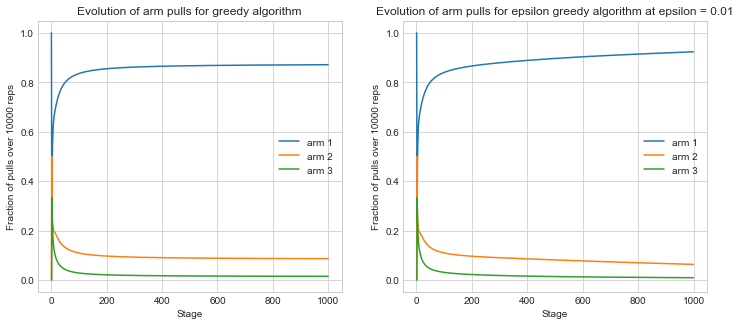

In [8]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')

plt.figure(figsize=[12,5])

arm1 = epsilon0K[1,:]/epsilon0K[0,:]
arm2 = epsilon0K[2,:]/epsilon0K[0,:]
arm3 = epsilon0K[3,:]/epsilon0K[0,:]
t = range(T)

plot1 = plt.subplot(121)
plt.plot(t, arm1, label = 'arm 1')
plt.plot(t, arm2, label = 'arm 2')
plt.plot(t, arm3, label = 'arm 3')
plt.xlabel("Stage")
plt.ylabel("Fraction of pulls over 10000 reps")
plt.legend(loc="center right")
plot1.set_title("Evolution of arm pulls for greedy algorithm")

arm11 = epsilon001K[1,:]/epsilon001K[0,:]
arm21 = epsilon001K[2,:]/epsilon001K[0,:]
arm31 = epsilon001K[3,:]/epsilon001K[0,:]
# t = range(T)

plot2 = plt.subplot(122)
plt.plot(t, arm11, label = 'arm 1')
plt.plot(t, arm21, label = 'arm 2')
plt.plot(t, arm31, label = 'arm 3')
plt.xlabel("Stage")
plt.ylabel("Fraction of pulls over 10000 reps")
plt.legend(loc="center right")
plot2.set_title("Evolution of arm pulls for epsilon greedy algorithm at epsilon = 0.01")

plt.savefig('Q4a Results 1.png', dpi = 800)

plt.show()

/Users/fietekrutein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/Users/fietekrutein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/Users/fietekrutein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/Users/fietekrutein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/Users/fietekrutein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/Users/fietekrutein/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


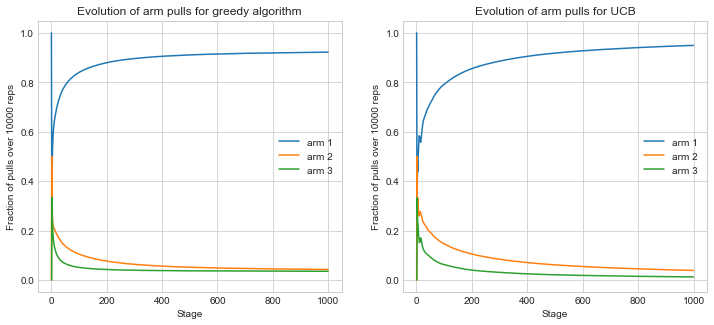

In [9]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')

plt.figure(figsize=[12,5])

arm1 = epsilon01K[1,:]/epsilon01K[0,:]
arm2 = epsilon01K[2,:]/epsilon01K[0,:]
arm3 = epsilon01K[3,:]/epsilon01K[0,:]
t = range(T)

plot1 = plt.subplot(121)
plt.plot(t, arm1, label = 'arm 1')
plt.plot(t, arm2, label = 'arm 2')
plt.plot(t, arm3, label = 'arm 3')
plt.xlabel("Stage")
plt.ylabel("Fraction of pulls over 10000 reps")
plt.legend(loc="center right")
plot1.set_title("Evolution of arm pulls for greedy algorithm")

arm1UCB = UCBK[1,:]/UCBK[0,:]
arm2UCB = UCBK[2,:]/UCBK[0,:]
arm3UCB = UCBK[3,:]/UCBK[0,:]
t = range(T)

plot2 = plt.subplot(122)
plt.plot(t, arm1UCB, label = 'arm 1')
plt.plot(t, arm2UCB, label = 'arm 2')
plt.plot(t, arm3UCB, label = 'arm 3')
plt.xlabel("Stage")
plt.ylabel("Fraction of pulls over 10000 reps")
plt.legend(loc="center right")
plot2.set_title("Evolution of arm pulls for UCB")

plt.savefig('Q4a Results 2.png', dpi = 800)

plt.show()